In [1]:
%pip install plotly.express 
%matplotlib inline


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import plotly_express as px
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

In [2]:
def h(x, theta):
    return np.dot(x, theta)

In [3]:
def mean_squared_error(y_predicted, y_label):
    return np.sum((y_predicted - y_label) ** 2) / len(y_label)

In [4]:
class LeastSquaresRegression():
    def __init__(self, ):
        self.theta_ = None
    def fit(self, X, y):
        part_1 = np.dot(X.T, X)
        part_2 = np.dot(X.T, y)
        my_inv = np.linalg.inv(part_1)
        self.theta_ = np.dot(my_inv, part_2)
    def predict(self, X):
        return h(X, self.theta_)

In [5]:
X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)

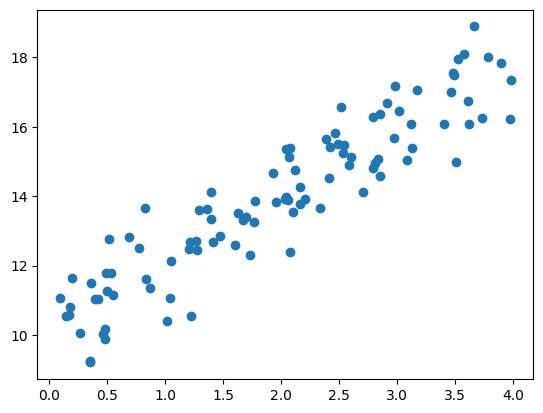

In [6]:
fig = plt.scatter(X, y)
plt.show()

In [7]:
def bias_column(X):
   return np.c_[np.ones((X.shape[0], 1)), X] # np.append(np.ones((20, 1)), X, axis=1)

X_new = bias_column(X)
print(X[:5])
print(" ---- ")
print(X_new[:5])

[[0.09387457]
 [2.79299885]
 [1.60006485]
 [1.95801583]
 [2.16021503]]
 ---- 
[[1.         0.09387457]
 [1.         2.79299885]
 [1.         1.60006485]
 [1.         1.95801583]
 [1.         2.16021503]]


In [8]:
model = LeastSquaresRegression()
model.fit(X_new, y)

print(model.theta_)

[[10.20543361]
 [ 1.9075295 ]]


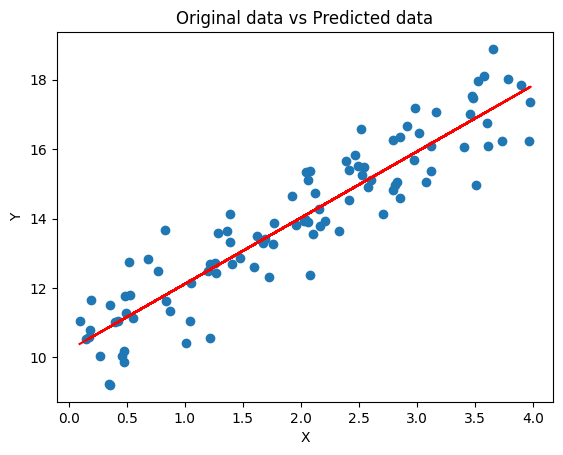

In [9]:
y_new = model.predict(X_new)
def my_plot(X, y, y_new):
    plt.scatter(X, y, label="Original data")
    plt.plot(X, y_new, label="Predicted data", color='r')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title("Original data vs Predicted data")
    plt.show()
my_plot(X, y, y_new)

In [10]:
class GradientDescentOptimizer():
    def __init__(self, f, fprime, start, learning_rate = 0.1):
        self.f_      = f                       # The function
        self.fprime_ = fprime                  # The gradient of f
        self.current_ = start                  # The current point being evaluated
        self.learning_rate_ = learning_rate    # Does this need a comment ?
    
        # Save history as attributes
        self.history_ = [start]
    
    def step(self):
        # Take a gradient descent step
        # 1. Compute the new value and update self.current_
        self.current_ = self.current_ - self.learning_rate_ * self.fprime_(self.current_)
        # 2. Append the new value to history
        self.history_.append(self.current_)
    
    def optimize(self, iterations = 100):
        # Use the gradient descent to get closer to the minimum:
        # For each iteration, take a gradient step
        iters = 0
        while iters <= iterations:
            self.step()
            iters += 1
                
    
    def getCurrentValue(self):
      # Getter for current_
        return self.current_
    
    def print_result(self):
        print("Best theta found is " + str(self.current_))
        print("Value of f at this theta: f(theta) = " + str(self.f_(self.current_)))
        print("Value of f prime at this theta: f'(theta) = " + str(self.fprime_(self.current_)))

In [11]:
def f(x):
    a = np.array([2, 6]).reshape(2, 1)
    return 3 + np.dot((x - a).T, (x - a)) 

In [12]:
def fprime(x):
    a = np.array([2, 6])
    return 2 * (x - a)

In [13]:
grad = GradientDescentOptimizer(f, fprime, np.random.normal(size=(2,)), 0.1)
grad.optimize(10)
grad.print_result()

Best theta found is [1.90978187 5.33177329]
Value of f at this theta: f(theta) = [[19.73802366  5.43260664]
 [ 5.43260664 14.54724021]]
Value of f prime at this theta: f'(theta) = [-0.18043626 -1.33645341]


# Visualization

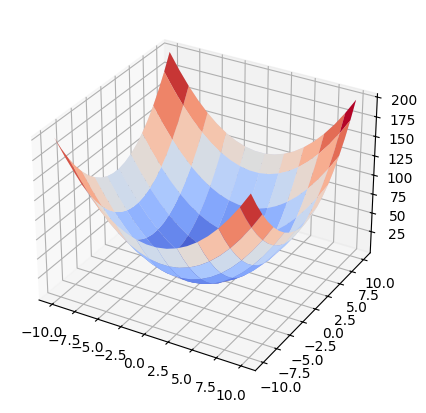

In [16]:
# 3D plot of quadratic function
a = np.linspace(-10, 10, 20)
b = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(a, b)
Z = X ** 2 + Y ** 2

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='b', alpha=0.1)
surface = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, rstride=2, cstride=2)
plt.show()

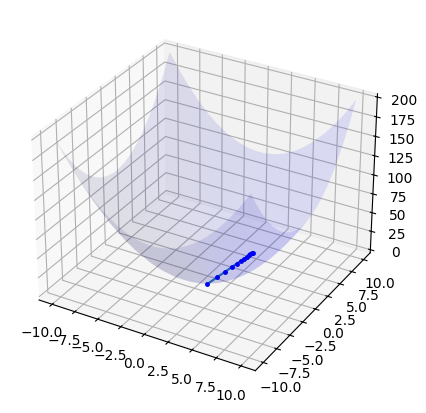

In [17]:
# 3D plot with gradient descent path
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='b', alpha=0.1)
ax.plot([t[0] for t in grad.history_], [t[1] for t in grad.history_], markerfacecolor='b', markeredgecolor='b', marker='.', markersize=5)
plt.show()